# Análise exploratória dos dados (EDA)

O diabetes é uma doença crônica grave na qual os indivíduos perdem a capacidade de regular efetivamente os níveis de glicose no sangue e pode levar a uma redução na qualidade de vida e na expectativa de vida.

O Sistema de Vigilância de Fatores de Risco Comportamentais (BRFSS) é uma pesquisa telefônica relacionada à saúde que é coletada anualmente pelo CDC (Centro de Controle e Prevenção de Doenças dos Estados Unidos). A cada ano, a pesquisa coleta respostas de milhares de americanos sobre comportamentos de risco relacionados à saúde, condições crônicas de saúde e o uso de serviços preventivos. Para este projeto, foi utilizado conjunto de dados disponível no Kaggle para o ano de 2015. 

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

Dicionário de variáveis:

- `Diabetes_binary`: 0 = sem diabetes, 1 = com diabetes
- `HighBP`: 0 = sem pressão alta, 1 = com pressão alta
- `HighChol`: 0 = sem colesterol alto, 1 = com colesterol alto
- `CholCheck`: 0 = não fez exame de colesterol na vida, 1 = fez exame de colesterol alguma vez
- `BMI`: Índice de Massa Corporal (IMC)
- `Smoker`: 0 = não fumante, 1 = fumante
- `Stroke`: 0 = sem histórico de AVC, 1 = com histórico de AVC
- `HeartDiseaseorAttack`: 0 = sem histórico de doença cardíaca ou ataque cardíaco, 1 = com histórico de doença cardíaca ou ataque cardíaco
- `PhysActivity`: 0 = não pratica atividade física, 1 = pratica atividade física
- `Fruits`: 0 = não consome frutas, 1 = consome frutas
- `Veggies`: 0 = não consome vegetais, 1 = consome vegetais
- `HvyAlcoholConsump`: 0 = não consome álcool em altas quantidades, 1 = consome álcool em altas quantidades
- `AnyHealthcare`: 0 = não tem plano de saúde, 1 = tem plano de saúde
- `NoDocbcCost`: 0 = não foi ao médico por questões financeiras, 1 = foi ao médico por questões financeiras (últimos 12 meses)
- `GenHlth`: Saúde geral (1 a 5) - 1 = Excelente, 2 = Muito boa, 3 = Boa, 4 = Aceitável, 5 = Ruim
- `MentHlth`: Nos últimos 30 dias, quantos dias a saúde mental não foi boa (0 a 30)
- `PhysHlth`: Nos últimos 30 dias, quantos dias a saúde física não foi boa (0 a 30)
- `DiffWalk`: 0 = não tem dificuldade para caminhar, 1 = tem dificuldade para caminhar
- `Sex`: 0 = feminino, 1 = masculino
- `Age`: Idade em faixas 1 = 18-24; 2 = 25-29; 3 = 30-34; 4 = 35-39; 5 = 40-44; 6 = 45-49; 7 = 50-54; 8 = 55-59; 9 = 60-64; 10 = 65-69; 11 = 70-74; 12 = 75-79; 13 = 80+
- `Education`: Níveis de ensino 1 = nunca frequentou a escola; 2 = escola primária; 3 = escola secundária incompleta ; 4 = escola secundária; 5 = faculdade incompleta ou curso técnico; 6 = completou faculdade ou diplomas superiores
- `Income`: Renda anual (dólares) em faixas 1 = < 10.000; 2 = 10.000-14.999; 3 = 15.000-19.999; 4 = 20.000-24.999; 5 = 25.000-34.999; 6 = 35.000-49.999; 7 = 50.000-74.999; 8 = 75.000+

##### Bibliotecas e funções importadas

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import kstest, norm, chi2_contingency

# funções desenvolvidas para o projeto
from src.estatistica import (
    analise_mannwhitneyu,
    analise_levene, 
    analise_ttest_ind,
    remove_outliers,
    grafico_variaveis_categoricas
)
from src.config import DADOS_TRATADOS

In [7]:
df_diabetes_tratado = pd.read_parquet(DADOS_TRATADOS)
df_diabetes_tratado.head()

,Diabetes,PressaoAlta,ColesterolAlto,ColesterolExame,IMC,Fumante,AVC,ProblemaCardiaco,AtividadeFisica,ComeFrutas,...,PlanoSaude,SemDinheiroConsultas,SaudeGeral,DiasProblemasMentais,DiasProblemasFisicos,DificuldadeAndar,Genero,FaixaIdade,Ensino,FaixaRenda
0,Não,Sim,Não,Sim,26,Não,Não,Não,Sim,Não,...,Sim,Não,Boa,5,30,Não,Masculino,35-39,Faculdade+,$75.000+
1,Não,Sim,Sim,Sim,26,Sim,Sim,Não,Não,Sim,...,Sim,Não,Boa,0,0,Não,Masculino,75-79,Faculdade+,$75.000+
2,Não,Não,Não,Sim,26,Não,Não,Não,Sim,Sim,...,Sim,Não,Excelente,0,10,Não,Masculino,80+,Faculdade+,$75.000+
3,Não,Sim,Sim,Sim,28,Sim,Não,Não,Sim,Sim,...,Sim,Não,Boa,0,3,Não,Masculino,70-74,Faculdade+,$75.000+
4,Não,Não,Não,Sim,29,Sim,Não,Não,Sim,Sim,...,Sim,Não,Muito boa,0,0,Não,Feminino,55-59,Faculdade inc. ou Técnico,$75.000+


In [8]:
df_diabetes_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Diabetes                70692 non-null  category
 1   PressaoAlta             70692 non-null  category
 2   ColesterolAlto          70692 non-null  category
 3   ColesterolExame         70692 non-null  category
 4   IMC                     70692 non-null  int8    
 5   Fumante                 70692 non-null  category
 6   AVC                     70692 non-null  category
 7   ProblemaCardiaco        70692 non-null  category
 8   AtividadeFisica         70692 non-null  category
 9   ComeFrutas              70692 non-null  category
 10  ComeLegumes             70692 non-null  category
 11  ConsomeBebidaAlcoolica  70692 non-null  category
 12  PlanoSaude              70692 non-null  category
 13  SemDinheiroConsultas    70692 non-null  category
 14  SaudeGeral            

##### Separando as colunas em 5 variáveis específicas:
- `colunas_numericas` - colunas com valores numéricos.
- `coluna_alvo` - coluna que usaremos como referência na análise.
- `colunas_categoricas` - todas as colunas do tipo category.
- `colunas_binarias` - colunas binárias do tipo category.
- `colunas_nao_binarias` - colunas não binárias do tipo category.

In [10]:
colunas_numericas = df_diabetes_tratado.select_dtypes(include="number").columns.to_list()

coluna_alvo = "Diabetes"

colunas_categoricas = df_diabetes_tratado.select_dtypes(include="category").columns.to_list()
colunas_categoricas.remove(coluna_alvo)

colunas_binarias = df_diabetes_tratado.nunique()[df_diabetes_tratado.nunique() == 2].index.to_list()
colunas_binarias.remove(coluna_alvo)

colunas_nao_binarias = list(set(colunas_categoricas) - set(colunas_binarias))

##### Visualizando as colunas distribuídas para cada variável

In [12]:
colunas_numericas

['IMC', 'DiasProblemasMentais', 'DiasProblemasFisicos']

In [13]:
coluna_alvo

'Diabetes'

In [14]:
colunas_categoricas

['PressaoAlta',
 'ColesterolAlto',
 'ColesterolExame',
 'Fumante',
 'AVC',
 'ProblemaCardiaco',
 'AtividadeFisica',
 'ComeFrutas',
 'ComeLegumes',
 'ConsomeBebidaAlcoolica',
 'PlanoSaude',
 'SemDinheiroConsultas',
 'SaudeGeral',
 'DificuldadeAndar',
 'Genero',
 'FaixaIdade',
 'Ensino',
 'FaixaRenda']

In [15]:
colunas_binarias

['PressaoAlta',
 'ColesterolAlto',
 'ColesterolExame',
 'Fumante',
 'AVC',
 'ProblemaCardiaco',
 'AtividadeFisica',
 'ComeFrutas',
 'ComeLegumes',
 'ConsomeBebidaAlcoolica',
 'PlanoSaude',
 'SemDinheiroConsultas',
 'DificuldadeAndar',
 'Genero']

In [16]:
colunas_nao_binarias

['Ensino', 'FaixaIdade', 'SaudeGeral', 'FaixaRenda']

## Variáveis numéricas

##### Verificando a influência de cada variável numérica na coluna alvo 

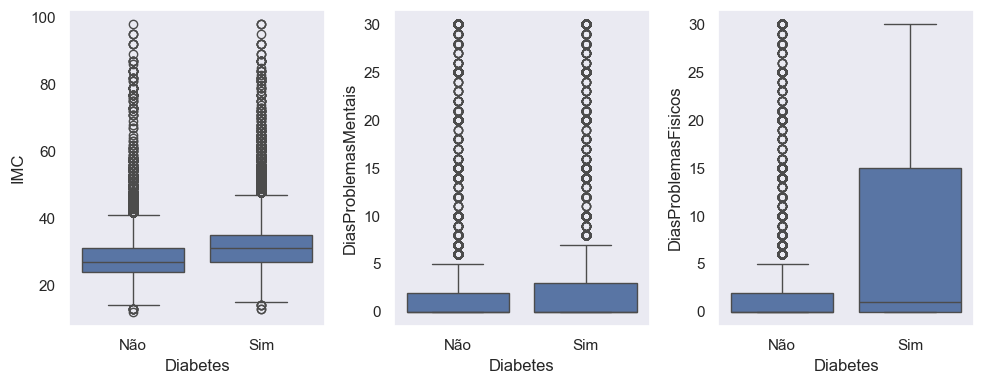

In [19]:
sns.set_theme(style='dark')

fig, axs = plt.subplots(nrows=1, ncols=3, tight_layout=True, figsize=(10, 4))

for ax, coluna in zip(axs, colunas_numericas):
    sns.boxplot(data=df_diabetes_tratado, x=coluna_alvo, y=coluna, ax=ax)

plt.show()

##### De acordo com o boxplot:

- IMC - No `Sim`, aparentemente, os valores de IMC têm uma tendência a serem um pouco mais altos
- DiasProblemasMentais e DiasProblemasFisicos - No `Sim` de ambas, os valores têm uma tendência a serem um pouco mais altos. Pessoas que têm diabetes, aparentemente, relataram por mais dias que elas não estavam bem mentalmente e também não estavam bem fisicamente.

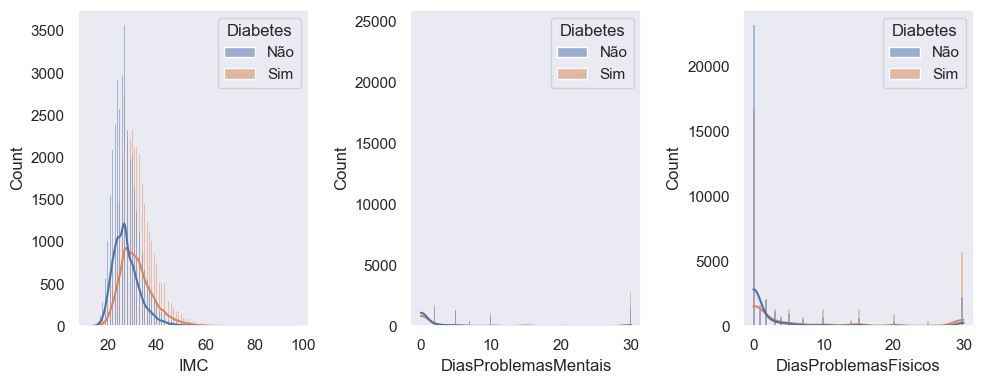

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=3, tight_layout=True, figsize=(10,4))

for ax, coluna in zip(axs, colunas_numericas):
    sns.histplot(data=df_diabetes_tratado, x=coluna, hue=coluna_alvo, kde=True, ax=ax);

##### Com base no histograma:
- A coluna IMC foi a única que chamou atenção pela forma e semelhança com uma distribuição normal, focaremos nela para realizar alguns testes estatísticos
    - `Observação`: *os testes estatísticos servem para variáveis com números contínuos, mas estamos lidando com números inteiros*
- Atenção para os dados de IMC terem sido arredondados para inteiros
- Será que devemos considerar que há diferença entre diabéticos e não diabéticos com base no IMC?

In [23]:
df_diabetes_tratado.groupby(coluna_alvo, observed=False).describe().T

Diabetes                             Não           Sim
IMC                  count  35346.000000  35346.000000
                     mean      27.769960     31.944011
                     std        6.187636      7.363401
                     min       12.000000     13.000000
                     25%       24.000000     27.000000
                     50%       27.000000     31.000000
                     75%       31.000000     35.000000
                     max       98.000000     98.000000
DiasProblemasMentais count  35346.000000  35346.000000
                     mean       3.042268      4.461806
                     std        7.208408      8.947717
                     min        0.000000      0.000000
                     25%        0.000000      0.000000
                     50%        0.000000      0.000000
                     75%        2.000000      3.000000
                     max       30.000000     30.000000
DiasProblemasFisicos count  35346.000000  35346.000000
                     mean       3.666355      7.954479
                     std        8.098339     11.301491
                     min        0.000000      0.000000
                     25%        0.000000      0.000000
                     50%        0.000000      1.000000
                     75%        2.000000     15.000000
                     max       30.000000     30.000000

##### Analisando a correlação entre as variáveis numéricas

In [25]:
df_diabetes_tratado.corr(numeric_only=True)

,IMC,DiasProblemasMentais,DiasProblemasFisicos
IMC,1.000000,0.104682,0.161862
DiasProblemasMentais,0.104682,1.000000,0.380272
DiasProblemasFisicos,0.161862,0.380272,1.000000


* Teste t de Student para comparar médias de IMC entre diabéticos e não diabéticos?
    - *Obs.: teste paramétrico*
* Ou teste Mann-Whitney U para comparar medianas de IMC entre diabéticos e não diabéticos?
    - *Obs.: teste não paramétrico*

### Faz sentido testar a normalidade das variáveis numéricas?

In [28]:
df_diabetes_tratado.groupby(coluna_alvo, observed=False).skew(numeric_only=True)

,IMC,DiasProblemasMentais,DiasProblemasFisicos
Diabetes,,,
Não,2.231015,2.808070,2.480202
Sim,1.527018,2.065169,1.150047


Com base na assimetria, a forma da distribuição é assimétrica positiva. Principalmente na coluna IMC, existe uma diferença entre `Sim` e `Não`, que no gráfico de histograma ficou evidente

In [30]:
df_diabetes_tratado.groupby(coluna_alvo, observed=False)[colunas_numericas].apply(pd.DataFrame.kurtosis)

,IMC,DiasProblemasMentais,DiasProblemasFisicos
Diabetes,,,
Não,12.901012,7.012218,4.910598
Sim,5.717382,2.873176,-0.341922


Com base na curtose, a distribuição é leptocúrtica. Analisando o histograma da coluna IMC e a curtose, podemos notar que a curva da distribuição tem um pico alto e as caudas mais pesadas do que a distribuição normal

##### Separando as categorias da coluna alvo em duas variáveis

In [33]:
dados_imc_sim = df_diabetes_tratado.query("Diabetes == 'Sim'")["IMC"].values
dados_imc_nao = df_diabetes_tratado.query("Diabetes == 'Não'")["IMC"].values

Como as variáveis possuem dados > 5000, vamos descartar o teste Shapiro-Wilk e usar o teste Kolmogorov-Smirnov, para verificar se as variáveis univariadas seguem uma distribuição teórica, neste caso será a normal

In [35]:
print(kstest(dados_imc_nao, norm.cdf, args=(dados_imc_nao.mean(), dados_imc_nao.std())))
print(kstest(dados_imc_sim, norm.cdf, args=(dados_imc_sim.mean(), dados_imc_sim.std())))

KstestResult(statistic=0.1209153634702329, pvalue=0.0, statistic_location=28, statistic_sign=1)
KstestResult(statistic=0.10452803408478695, pvalue=0.0, statistic_location=33, statistic_sign=1)


Como $pvalue < 0.05$ a hipótese nula é rejeitada. Aparentemente, as variáveis não provém de uma distribuição normal por meio do teste KS. Como a base de dados é muito grande, os testes estatísticos podem não ser tão confiáveis.

##### Transformando as variáveis separadas da coluna alvo em um DataFrame.

In [38]:
dataframe_imc = pd.DataFrame({"Não": dados_imc_nao, "Sim": dados_imc_sim})
dataframe_imc

,Não,Sim
0,26,30
1,26,25
2,26,28
3,28,23
4,29,27
...,...,...
35341,23,37
35342,29,29
35343,24,25
35344,53,18


##### Usando o teste de Levene para testar a homogeneidade de variâncias.

In [40]:
analise_levene(dataframe_imc, centro="median")

Teste de Levene
estatistia_levene: 888.297
Ao menos uma variância é diferente (valor p: 0.000)


##### Usando o teste de T de Student (paramétrico) para comparar se as médias de duas variáveis independentes são idênticas, extraídas da mesma população.

- *Obs.: Como o teste de Levene falhou, usaremos um parâmetro declarando que as variâncias são diferentes, já que o teste T permite seu uso nas duas situações*

In [42]:
analise_ttest_ind(dataframe_imc, variancias_iguais=False)

Teste Ttest_ind
estatistica_ttest_ind=-81.591
Rejeita a hipótese nula (valor p: 0.000)


##### Usando o teste U de Mann-Whitney (não paramétrico) para testar a igualdade das medianas.

In [44]:
analise_mannwhitneyu(dataframe_imc)

Teste U de Mann-Whitney
estatistica_mw=388166232.000
Rejeita a hipótese nula (valor p: 0.000)


Como pvalue < 0.05, houve a rejeição da hipótese nula de ambos os testes, t de Student e Mann-Whitney U. Com isso, podemos abrir o seguinte questionamento:

### Os outliers interferem?

##### Criando uma cópia do DataFrame e removendo os outliers das variáveis numéricas.

In [48]:
df_diabetes_sem_outliers = df_diabetes_tratado.copy()

for coluna in colunas_numericas:
    df_diabetes_sem_outliers[coluna] = remove_outliers(df_diabetes_sem_outliers[coluna])

df_diabetes_sem_outliers.describe()

,IMC,DiasProblemasMentais,DiasProblemasFisicos
count,68511.000000,58876.000000,60068.000000
mean,29.129673,0.526615,1.880619
std,5.695466,1.271375,3.727202
min,13.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000
75%,33.000000,0.000000,2.000000
max,45.000000,5.000000,15.000000


In [49]:
df_diabetes_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Diabetes                70692 non-null  category
 1   PressaoAlta             70692 non-null  category
 2   ColesterolAlto          70692 non-null  category
 3   ColesterolExame         70692 non-null  category
 4   IMC                     68511 non-null  float64 
 5   Fumante                 70692 non-null  category
 6   AVC                     70692 non-null  category
 7   ProblemaCardiaco        70692 non-null  category
 8   AtividadeFisica         70692 non-null  category
 9   ComeFrutas              70692 non-null  category
 10  ComeLegumes             70692 non-null  category
 11  ConsomeBebidaAlcoolica  70692 non-null  category
 12  PlanoSaude              70692 non-null  category
 13  SemDinheiroConsultas    70692 non-null  category
 14  SaudeGeral            

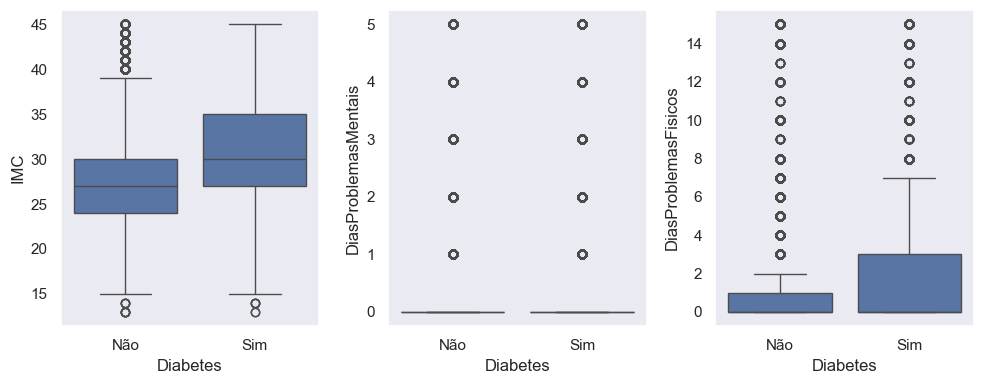

In [50]:
fig, axs = plt.subplots(1, 3, tight_layout=True, figsize=(10,4))

for ax,coluna in zip(axs, colunas_numericas):
    sns.boxplot(data=df_diabetes_sem_outliers, x=coluna_alvo, y=coluna, ax=ax);

Com base na boxplot:
- IMC - Podemos notar que os bigodes dos boxplots parecem simétricos, o que se indica uma proximidade de uma distribuição normal

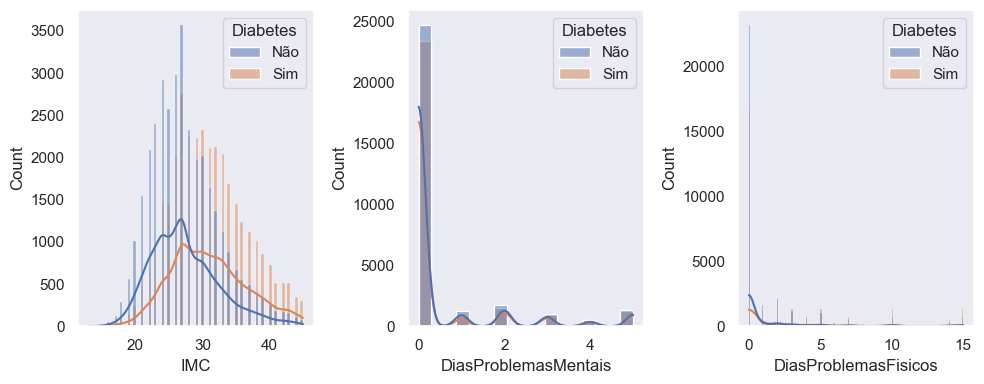

In [52]:
fig, axs = plt.subplots(1, 3, tight_layout=True, figsize=(10,4))

for ax, coluna in zip(axs, colunas_numericas):
    sns.histplot(data=df_diabetes_sem_outliers, x=coluna, hue=coluna_alvo, kde=True, ax=ax);

### Refazendo os testes estatísticos após remover os outliers das variáveis numéricas

In [54]:
df_diabetes_sem_outliers.describe()

,IMC,DiasProblemasMentais,DiasProblemasFisicos
count,68511.000000,58876.000000,60068.000000
mean,29.129673,0.526615,1.880619
std,5.695466,1.271375,3.727202
min,13.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000
75%,33.000000,0.000000,2.000000
max,45.000000,5.000000,15.000000


In [55]:
df_diabetes_sem_outliers.groupby(coluna_alvo, observed=False).skew(numeric_only=True)

,IMC,DiasProblemasMentais,DiasProblemasFisicos
Diabetes,,,
Não,0.714415,2.454599,2.874805
Sim,0.323244,2.507093,1.856026


Com base na assimetria, os valores da coluna IMC tiveram uma redução considerável dos valores, ficando bem mais próximo de zero. Vale ressaltar que o zero significa simetria, ou seja, que os dados seguem distrição normal.

In [57]:
df_diabetes_sem_outliers.groupby(coluna_alvo, observed=False)[colunas_numericas].apply(pd.DataFrame.kurtosis)

,IMC,DiasProblemasMentais,DiasProblemasFisicos
Diabetes,,,
Não,0.481335,5.003764,8.079214
Sim,-0.343434,5.185706,2.367289


Com base na curtose, os valores tiveram uma redução considerável do achatamento da curva e estão mais próximos de zero, mesmo que `Não` seja leptocúrtica e `Sim` platicúrtica.

##### Separando as categorias da coluna alvo em duas variáveis sem outliers

In [60]:
dados_imc_sim_sem_outliers = df_diabetes_sem_outliers.query("Diabetes == 'Sim'")["IMC"].values
dados_imc_nao_sem_outliers = df_diabetes_sem_outliers.query("Diabetes == 'Não'")["IMC"].values

dataframe_imc_sem_outliers = pd.DataFrame({"Sim": dados_imc_sim_sem_outliers, "Não": dados_imc_nao_sem_outliers})
dataframe_imc_sem_outliers

,Sim,Não
0,30.0,26.0
1,25.0,26.0
2,28.0,26.0
3,23.0,28.0
4,27.0,29.0
...,...,...
35341,37.0,23.0
35342,29.0,29.0
35343,25.0,24.0
35344,18.0,NaN


##### Usando o teste Kolmogorov-Smirnov, para verificar se as variáveis univariadas seguem uma distribuição teórica, neste caso será a normal

- *Obs.: como o DataFrame sem outliers possui valores ausentes (NaN), precisaremos usar um parâmetro para omití-los, assim a função kstest funcionará corretamente*

In [62]:
print(
    kstest(
        dataframe_imc_sem_outliers["Não"], 
        norm.cdf, 
        args=(
            dataframe_imc_sem_outliers["Não"].mean(), 
            dataframe_imc_sem_outliers["Não"].std()), 
        nan_policy="omit"))
print(
    kstest(
        dataframe_imc_sem_outliers["Sim"], 
        norm.cdf, 
        args=(
            dataframe_imc_sem_outliers["Sim"].mean(), 
            dataframe_imc_sem_outliers["Sim"].std()), 
        nan_policy="omit"))

KstestResult(statistic=0.10815079726309146, pvalue=0.0, statistic_location=27.0, statistic_sign=1)
KstestResult(statistic=0.07345716240963396, pvalue=2.3370072025339465e-158, statistic_location=30.0, statistic_sign=1)


Aparentemente, as variáveis não provém de uma distribuição normal por meio do teste KS.

##### Usando o teste de Levene para testar a homogeneidade de variâncias.

In [65]:
analise_levene(dataframe_imc_sem_outliers, centro="median")

Teste de Levene
estatistia_levene: 532.986
Ao menos uma variância é diferente (valor p: 0.000)


##### Usando o teste de T de Student (paramétrico) para comparar se as médias de duas variáveis independentes são idênticas, extraídas da mesma população.

In [67]:
analise_ttest_ind(dataframe_imc_sem_outliers, variancias_iguais=False)

Teste Ttest_ind
estatistica_ttest_ind=85.248
Rejeita a hipótese nula (valor p: 0.000)


##### Usando o teste U de Mann-Whitney (não paramétrico) para testar a igualdade das medianas.

In [69]:
analise_mannwhitneyu(dataframe_imc_sem_outliers)

Teste U de Mann-Whitney
estatistica_mw=801702843.000
Rejeita a hipótese nula (valor p: 0.000)


Usando tanto o teste paramétrico quanto o teste não paramétrico, podemos concluir que as duas amostras da coluna `IMC` são diferentes, o que pode ser complementado com a análise dos boxplots.

## Variáveis categóricas

##### Usando coluna alvo binária

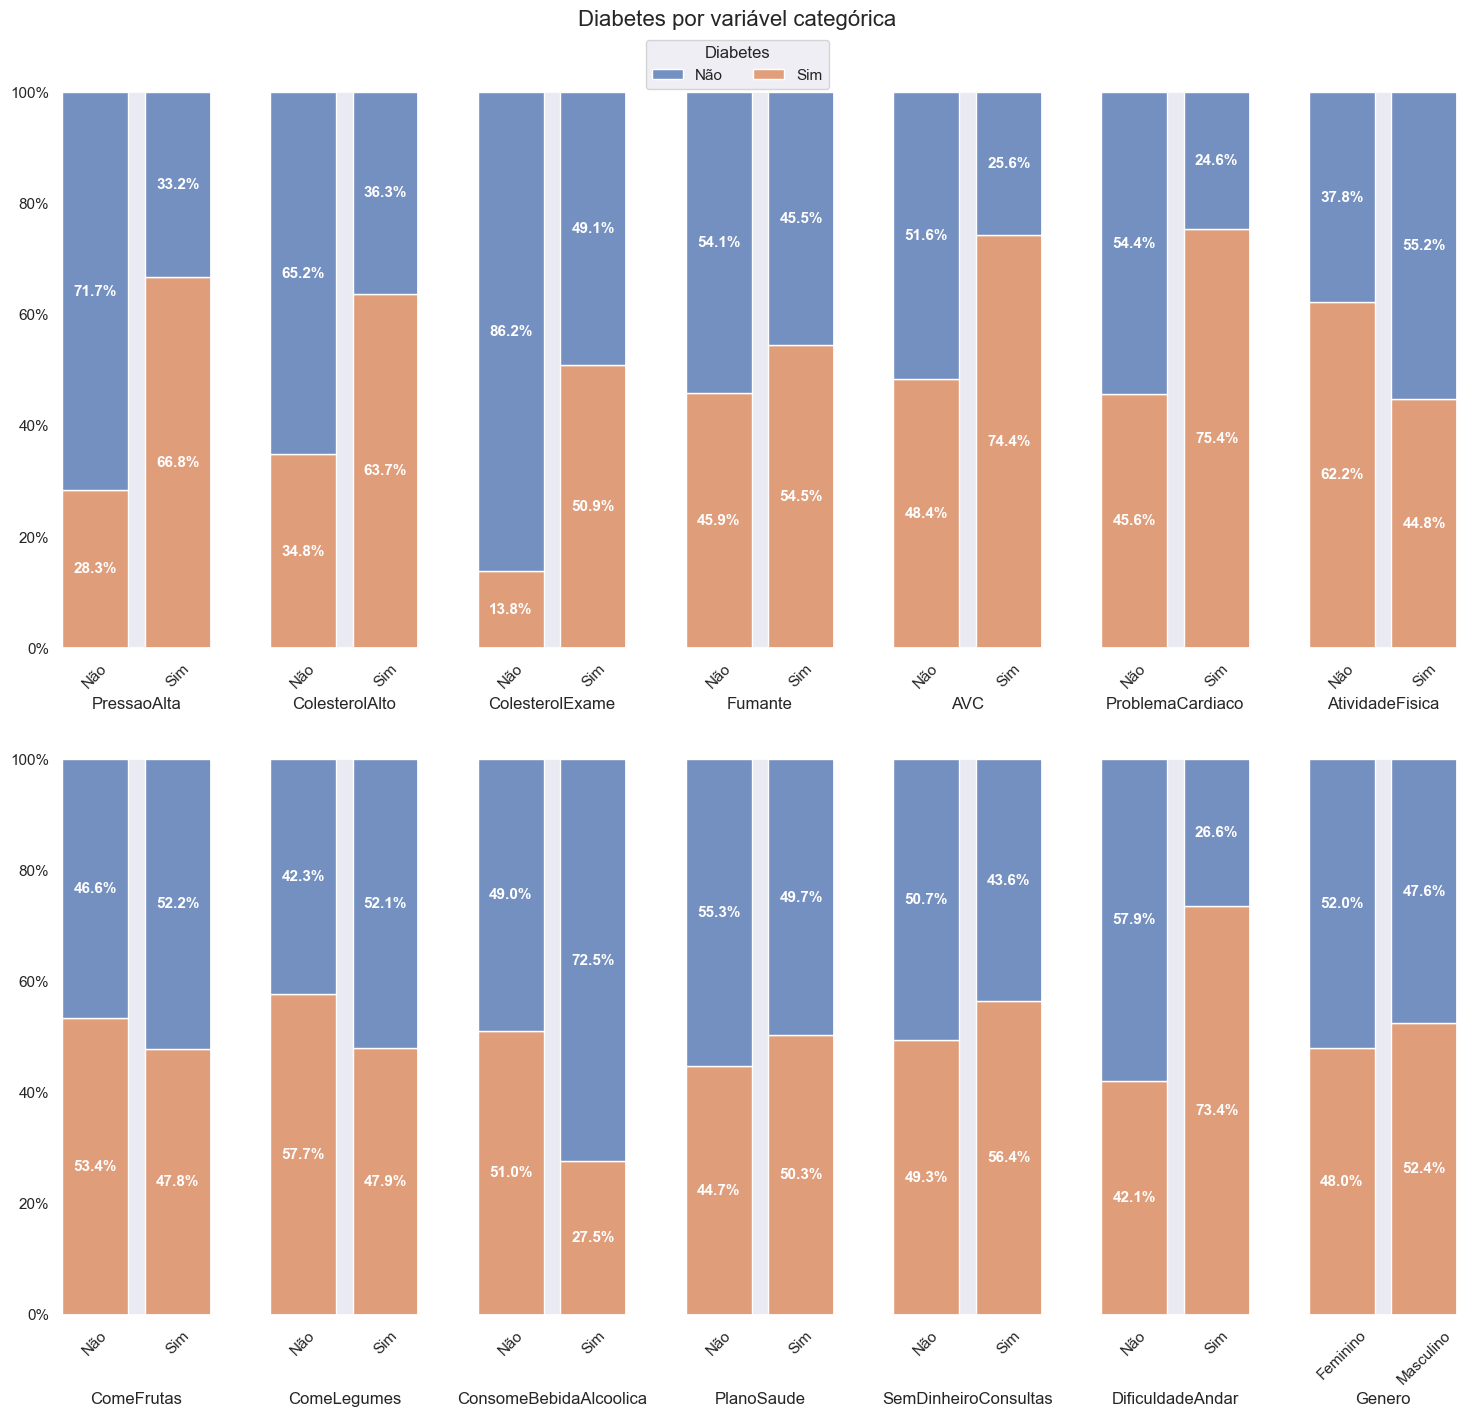

In [73]:
grafico_variaveis_categoricas(
    df_diabetes_tratado,
    coluna_analise=colunas_binarias,
    coluna_alvo=coluna_alvo,
    numero_linhas=2,
    numero_colunas=7,
    compartilhar_eixoy=True,
    espacamento_entre_linhas=0.2,
    tamanho_figura=(18,15)
)

#### Como as variáveis categóricas binárias se relacionam com a coluna diabetes:
- `PressaoAlta` - Observa-se que 66,8% das pessoas que declararam ter pressão alta também relataram ser diabéticas. Da mesma forma, 71,7% das pessoas que não possuem pressão alta também não são diabéticas. Isso indica uma possível associação entre essas condições.

- `ColesterolAlto`- Os dados mostram que 63,7% das pessoas com colesterol alto também são diabéticas, enquanto 65,2% das pessoas sem colesterol alto não têm diabetes. Esses resultados sugerem uma possível associação entre colesterol alto e diabetes.
- `ColesterolExame` - Os dados indicam que a maioria das pessoas não diabéticas não realiza exames de colesterol, o que pode sugerir uma menor preocupação com o monitoramento da saúde cardiovascular nesse grupo.
- `AVC` - Observa-se que 74,4% das pessoas que relataram ter tido AVC também declararam ser diabéticas, indicando uma possível relação entre diabetes e a ocorrência de AVC.
- `AtividadeFisica` - Entre as pessoas que não praticam atividade física, 62,2% são diabéticas, o que sugere uma possível relação entre o sedentarismo e a presença de diabetes.
- `ConsomeBebidaAlcoolica` - Entre as pessoas que relataram consumir bebidas alcoólicas, 72,5% não são diabéticas, sugerindo que o consumo de álcool pode não estar diretamente associado ao diabetes.
- `DificuldadeAndar` - 73,4% das pessoas que relataram dificuldades para andar também declararam ser diabéticas, sugerindo uma possível conexão entre a limitação na mobilidade e o diabetes.

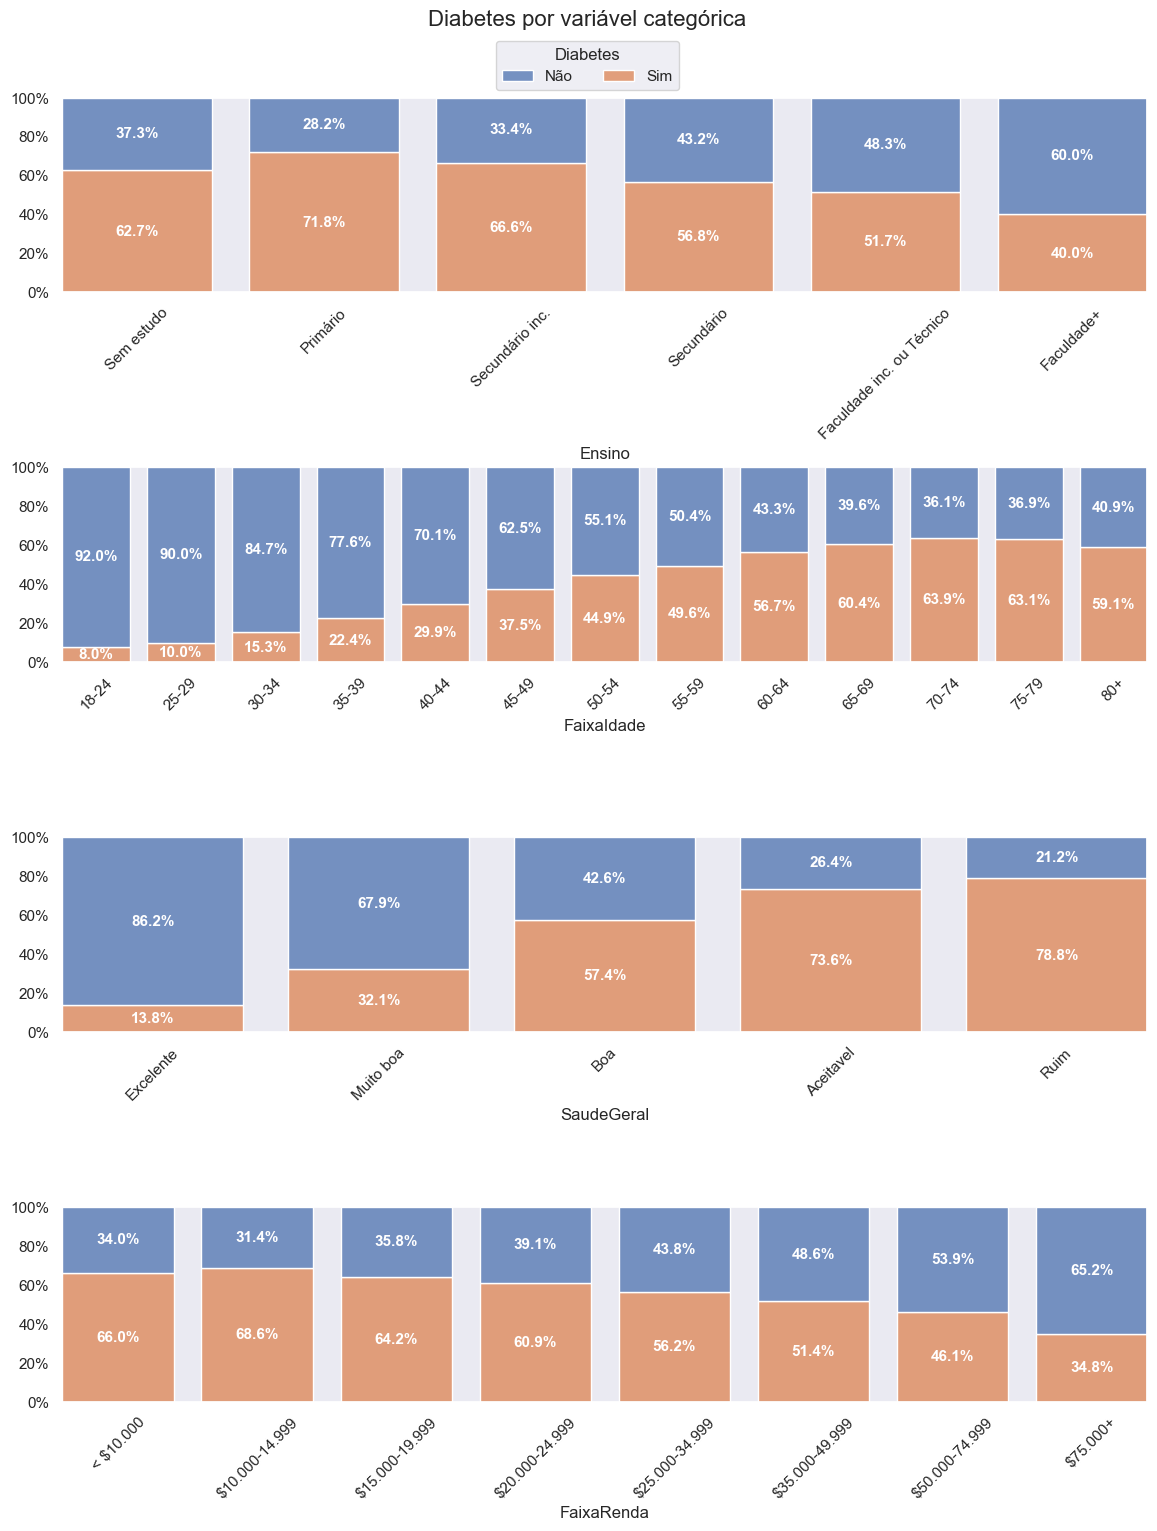

In [75]:
grafico_variaveis_categoricas(
    df_diabetes_tratado,
    coluna_analise=colunas_nao_binarias,
    coluna_alvo=coluna_alvo,
    numero_linhas=4,
    numero_colunas=1,
    compartilhar_eixoy=True,
    espacamento_entre_linhas=0.9,
    espacamento_entre_colunas=0.1
)

#### Como as variáveis categóricas não binárias se relacionam com a coluna diabetes:
- `Ensino` - O gráfico revela uma tendência decrescente na quantidade de relatos de diabetes à medida que o nível de escolaridade aumenta.

- `SaudeGeral` - Os dados mostram que apenas 13,8% das pessoas que consideram sua saúde excelente são diabéticas, enquanto 78,8% das pessoas que classificam sua saúde como ruim são diabéticas. Isso indica uma tendência: quanto melhor a percepção da saúde, menor a chance de ter diabetes, enquanto aqueles que avaliam sua saúde como ruim apresentam uma maior probabilidade de serem diabéticos.
- `FaixaRenda` - Pessoas com faixa salarial mais baixa têm uma maior probabilidade de ser diabéticas, enquanto observa-se que, quanto maior o salário, os relatos de diabetes vão diminuindo.
- `Faixaidade` - Entre as pessoas mais jovens, os relatos de diabetes são poucos. No entanto, uma tendência clara é observada: quanto mais avançada a idade, maior a probabilidade de a pessoa ser diabética.

##### Usando coluna alvo tendo três ou mais categorias

In [78]:
colunas_analise = ["SaudeGeral", "FaixaRenda"]

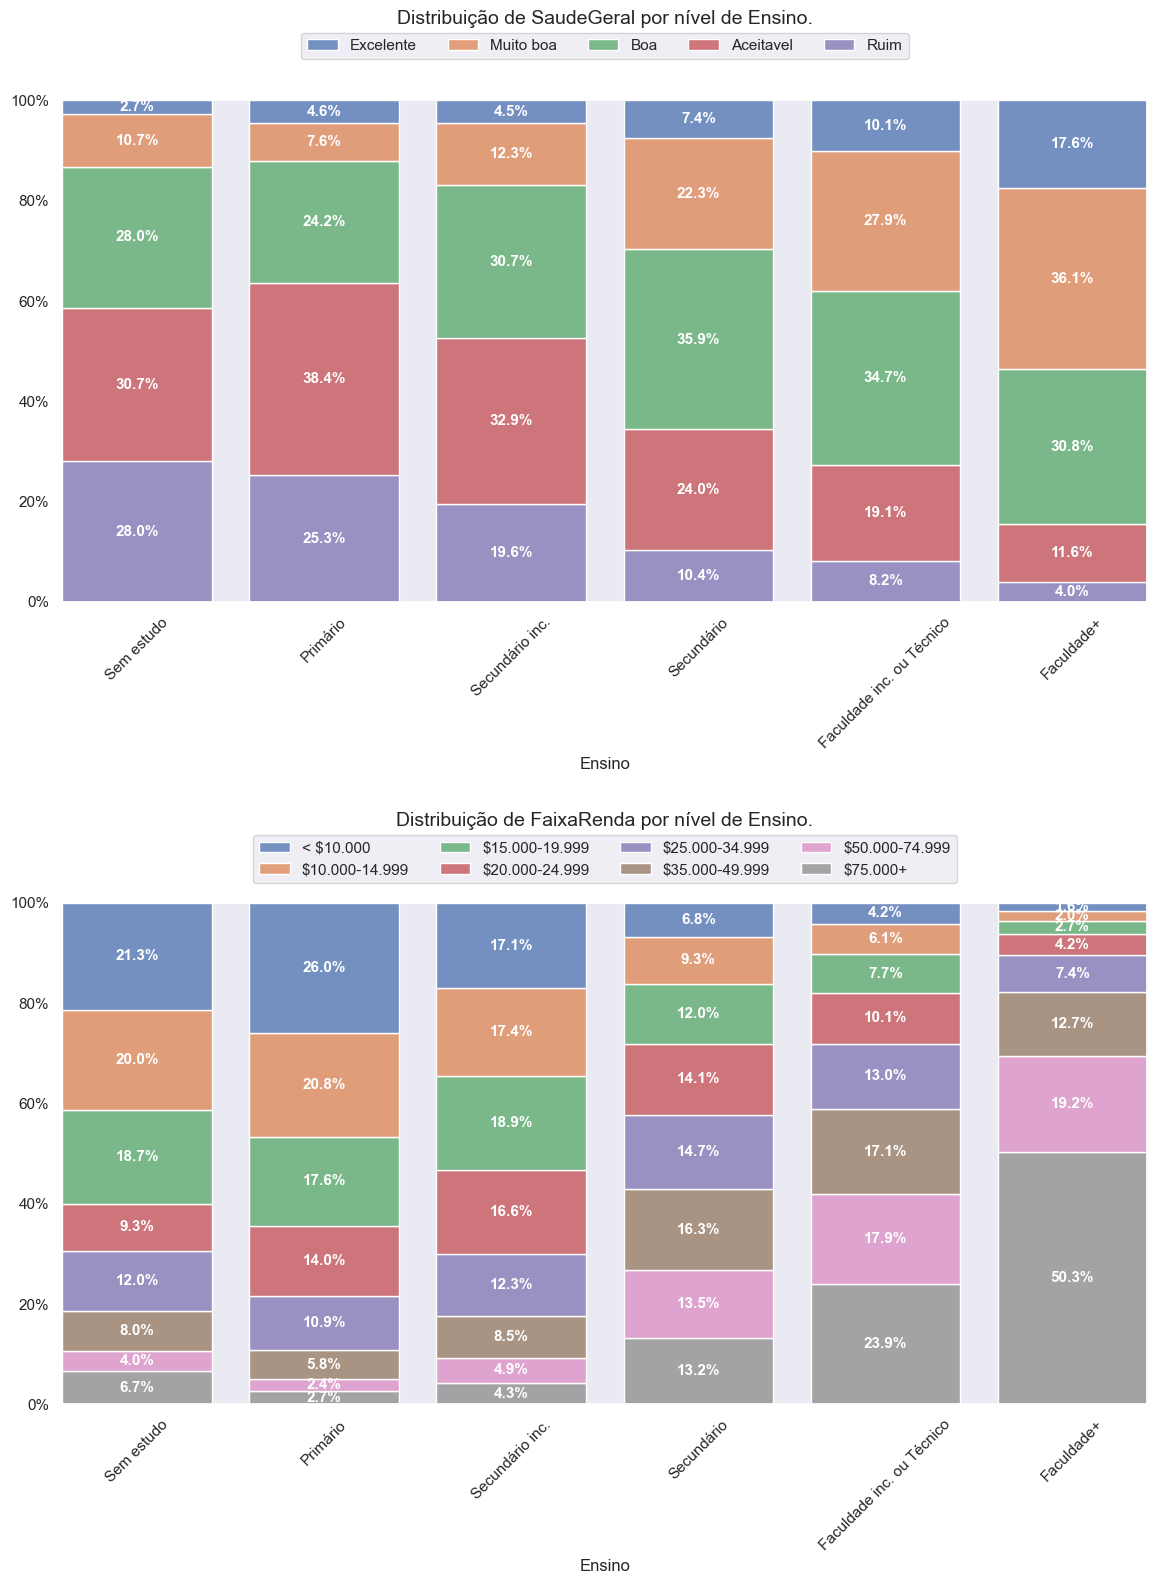

In [79]:
grafico_variaveis_categoricas(
    df_diabetes_tratado,
    coluna_analise=colunas_analise,
    coluna_alvo="Ensino",
    numero_linhas=2,
    numero_colunas=1,
    compartilhar_eixoy=True,
    analise_padrao=False,
    espacamento_entre_linhas=0.6,
    espacamento_entre_colunas=0.1
)

#### Qual a relação entre a coluna `Ensino` e as seguintes colunas:
- `SaudeGeral` - Observa-se uma tendência na classificação da própria saúde, com avaliações mais positivas à medida que o grau de escolaridade aumenta. Por outro lado, pessoas com menor nível de escolaridade ou sem escolaridade relatam uma saúde menos satisfatória.

- `FaixaRenda` - Pessoas com maior nível acadêmico tendem a ter uma faixa de renda mais alta, enquanto aquelas com baixo nível de escolaridade ou sem escolaridade geralmente têm uma faixa de renda mais baixa.

##### Criando uma tabela de contingência com todas as variáveis categóricas, tendo como base a coluna alvo

In [82]:
tabelas_contingencia = {}

for coluna in df_diabetes_tratado.select_dtypes("category").columns:
    if coluna != coluna_alvo:
        tabelas_contingencia[coluna] = pd.crosstab(df_diabetes_tratado[coluna_alvo], df_diabetes_tratado[coluna])

tabelas_contingencia["FaixaRenda"]

FaixaRenda,< $10.000,$10.000-14.999,$15.000-19.999,$20.000-24.999,$25.000-34.999,$35.000-49.999,$50.000-74.999,$75.000+
Diabetes,,,,,,,,
Não,1228,1412,1989,2604,3506,4996,6160,13451
Sim,2383,3086,3568,4054,4504,5291,5265,7195


Criando uma tabela de contingência com todas as variáveis categóricas, tendo como base a coluna alvo e exibindo a porcenagem ocupada por índice (linha)

In [84]:
for coluna in df_diabetes_tratado.select_dtypes("category").columns:
    if coluna != coluna_alvo:
        display(
            pd.crosstab(
                df_diabetes_tratado[coluna_alvo],
                df_diabetes_tratado[coluna],
                margins=True,
                margins_name="Total",
                normalize="index"
            ).style.format("{:.2%}")
        )

PressaoAlta,Não,Sim
Diabetes,,
Não,62.58%,37.42%
Sim,24.73%,75.27%
Total,43.65%,56.35%


ColesterolAlto,Não,Sim
Diabetes,,
Não,61.87%,38.13%
Sim,32.99%,67.01%
Total,47.43%,52.57%


ColesterolExame,Não,Sim
Diabetes,,
Não,4.27%,95.73%
Sim,0.68%,99.32%
Total,2.47%,97.53%


Fumante,Não,Sim
Diabetes,,
Não,56.77%,43.23%
Sim,48.18%,51.82%
Total,52.47%,47.53%


AVC,Não,Sim
Diabetes,,
Não,96.81%,3.19%
Sim,90.75%,9.25%
Total,93.78%,6.22%


ProblemaCardiaco,Não,Sim
Diabetes,,
Não,92.73%,7.27%
Sim,77.71%,22.29%
Total,85.22%,14.78%


AtividadeFisica,Não,Sim
Diabetes,,
Não,22.45%,77.55%
Sim,36.95%,63.05%
Total,29.70%,70.30%


ComeFrutas,Não,Sim
Diabetes,,
Não,36.19%,63.81%
Sim,41.46%,58.54%
Total,38.82%,61.18%


ComeLegumes,Não,Sim
Diabetes,,
Não,17.89%,82.11%
Sim,24.36%,75.64%
Total,21.12%,78.88%


ConsomeBebidaAlcoolica,Não,Sim
Diabetes,,
Não,93.81%,6.19%
Sim,97.65%,2.35%
Total,95.73%,4.27%


PlanoSaude,Não,Sim
Diabetes,,
Não,4.99%,95.01%
Sim,4.02%,95.98%
Total,4.50%,95.50%


SemDinheiroConsultas,Não,Sim
Diabetes,,
Não,91.80%,8.20%
Sim,89.41%,10.59%
Total,90.61%,9.39%


SaudeGeral,Excelente,Muito boa,Boa,Aceitavel,Ruim
Diabetes,,,,,
Não,20.21%,38.17%,28.21%,9.94%,3.48%
Sim,3.23%,18.05%,38.07%,27.70%,12.95%
Total,11.72%,28.11%,33.14%,18.82%,8.22%


DificuldadeAndar,Não,Sim
Diabetes,,
Não,86.58%,13.42%
Sim,62.88%,37.12%
Total,74.73%,25.27%


Genero,Feminino,Masculino
Diabetes,,
Não,56.51%,43.49%
Sim,52.09%,47.91%
Total,54.30%,45.70%


FaixaIdade,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80+
Diabetes,,,,,,,,,,,,,
Não,2.55%,3.55%,4.91%,6.13%,6.99%,8.22%,10.71%,12.28%,12.39%,12.16%,8.21%,5.63%,6.27%
Sim,0.22%,0.40%,0.89%,1.77%,2.97%,4.93%,8.74%,12.06%,16.22%,18.55%,14.54%,9.63%,9.08%
Total,1.38%,1.97%,2.90%,3.95%,4.98%,6.58%,9.72%,12.17%,14.30%,15.36%,11.38%,7.63%,7.68%


Ensino,Sem estudo,Primário,Secundário inc.,Secundário,Faculdade inc. ou Técnico,Faculdade+
Diabetes,,,,,,
Não,0.08%,1.31%,3.26%,23.78%,27.38%,44.19%
Sim,0.13%,3.35%,6.50%,31.31%,29.29%,29.42%
Total,0.11%,2.33%,4.88%,27.55%,28.33%,36.81%


FaixaRenda,< $10.000,$10.000-14.999,$15.000-19.999,$20.000-24.999,$25.000-34.999,$35.000-49.999,$50.000-74.999,$75.000+
Diabetes,,,,,,,,
Não,3.47%,3.99%,5.63%,7.37%,9.92%,14.13%,17.43%,38.06%
Sim,6.74%,8.73%,10.09%,11.47%,12.74%,14.97%,14.90%,20.36%
Total,5.11%,6.36%,7.86%,9.42%,11.33%,14.55%,16.16%,29.21%


##### Usando o teste qui-quadrado para verificar se existe associação das variáveis categóricas e a coluna alvo, por meio da diferença entre as frequências esperadas e as frequências observadas

In [86]:
for coluna, tabela in tabelas_contingencia.items():
    chi2, valor_p, _, _ = chi2_contingency(tabela)
    print(f"{coluna} - {chi2=:.3f}, {valor_p=:.3f}")

PressaoAlta - chi2=10287.973, valor_p=0.000
ColesterolAlto - chi2=5911.807, valor_p=0.000
ColesterolExame - chi2=939.632, valor_p=0.000
Fumante - chi2=522.481, valor_p=0.000
AVC - chi2=1111.079, valor_p=0.000
ProblemaCardiaco - chi2=3161.720, valor_p=0.000
AtividadeFisica - chi2=1778.961, valor_p=0.000
ComeFrutas - chi2=206.501, valor_p=0.000
ComeLegumes - chi2=444.081, valor_p=0.000
ConsomeBebidaAlcoolica - chi2=635.087, valor_p=0.000
PlanoSaude - chi2=37.796, valor_p=0.000
SemDinheiroConsultas - chi2=118.417, valor_p=0.000
SaudeGeral - chi2=12304.319, valor_p=0.000
DificuldadeAndar - chi2=5253.695, valor_p=0.000
Genero - chi2=139.262, valor_p=0.000
FaixaIdade - chi2=6179.057, valor_p=0.000
Ensino - chi2=2132.273, valor_p=0.000
FaixaRenda - chi2=3855.455, valor_p=0.000


Com base na rejeição da hipótese nula do teste qui-quadrado, conclui-se que há associação entre as categorias das variáveis estudadas.

##### Separando a correlação entre as variáveis categóricas usando o coeficiente de Spearman

In [89]:
resultados_correlacao = df_diabetes_tratado.select_dtypes("category").apply(lambda coluna: coluna.cat.codes).corr(method="spearman")

resultados_correlacao

,Diabetes,PressaoAlta,ColesterolAlto,ColesterolExame,Fumante,AVC,ProblemaCardiaco,AtividadeFisica,ComeFrutas,ComeLegumes,ConsomeBebidaAlcoolica,PlanoSaude,SemDinheiroConsultas,SaudeGeral,DificuldadeAndar,Genero,FaixaIdade,Ensino,FaixaRenda
Diabetes,1.000000,0.381516,0.289213,0.115382,0.085999,0.125427,0.211523,-0.158666,-0.054077,-0.079293,-0.094853,0.023191,0.040977,0.414259,0.272646,0.044413,0.261620,-0.169926,-0.232529
PressaoAlta,0.381516,1.000000,0.316515,0.103283,0.087438,0.129060,0.210750,-0.136102,-0.040852,-0.066624,-0.027030,0.035764,0.026517,0.324038,0.234784,0.040819,0.322180,-0.143543,-0.196896
ColesterolAlto,0.289213,0.316515,1.000000,0.085981,0.093398,0.099786,0.181187,-0.090453,-0.047384,-0.042836,-0.025443,0.031532,0.033199,0.239138,0.162043,0.017324,0.217974,-0.083177,-0.110289
ColesterolExame,0.115382,0.103283,0.085981,1.000000,-0.004331,0.022529,0.043497,-0.008249,0.017384,0.000349,-0.027146,0.106800,-0.062669,0.060257,0.044430,-0.007991,0.099208,-0.007693,0.007271
Fumante,0.085999,0.087438,0.093398,-0.004331,1.000000,0.064658,0.124418,-0.079823,-0.074811,-0.029926,0.077835,-0.012939,0.035799,0.149960,0.119789,0.112125,0.098822,-0.152918,-0.112241
AVC,0.125427,0.129060,0.099786,0.022529,0.064658,1.000000,0.223394,-0.079985,-0.008996,-0.047601,-0.023395,0.006484,0.036198,0.182517,0.192266,0.003822,0.123544,-0.071889,-0.134487
ProblemaCardiaco,0.211523,0.210750,0.181187,0.043497,0.124418,0.223394,1.000000,-0.098223,-0.019436,-0.036315,-0.037130,0.015687,0.036029,0.268815,0.232611,0.098161,0.225231,-0.093727,-0.148924
AtividadeFisica,-0.158666,-0.136102,-0.090453,-0.008249,-0.079823,-0.079985,-0.098223,1.000000,0.133813,0.149322,0.019111,0.027089,-0.063302,-0.270967,-0.276868,0.051753,-0.092685,0.193831,0.202370
ComeFrutas,-0.054077,-0.040852,-0.047384,0.017384,-0.074811,-0.008996,-0.019436,0.133813,1.000000,0.238605,-0.033246,0.029385,-0.045843,-0.099559,-0.050784,-0.088723,0.067778,0.104653,0.076732
ComeLegumes,-0.079293,-0.066624,-0.042836,0.000349,-0.029926,-0.047601,-0.036315,0.149322,0.238605,1.000000,0.022090,0.029152,-0.037146,-0.117258,-0.084072,-0.052604,-0.017208,0.153539,0.155816


### Criando um mapa de calor para analisar a correlação entre as variáveis categóricas

Obs.: Vale ressaltar que a variável `SaudeGeral` tem suas categorias na forma decrescente

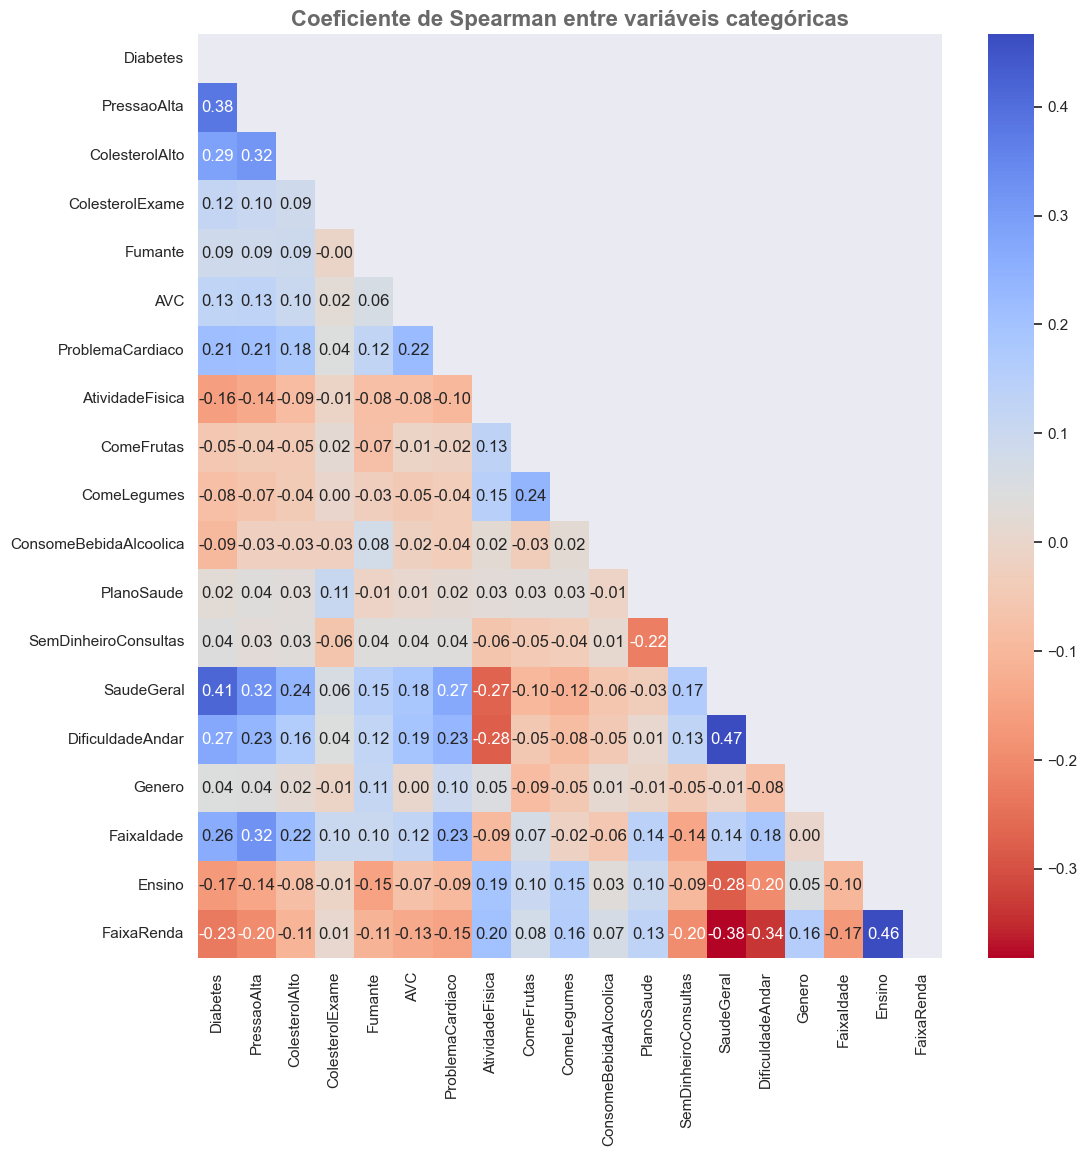

In [91]:
matriz = np.triu(resultados_correlacao) 

fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(resultados_correlacao, mask=matriz, annot=True, fmt=".2f", ax=ax, cmap="coolwarm_r")

plt.title("Coeficiente de Spearman entre variáveis categóricas", fontsize=16, weight="bold", color="dimgrey");